# **Anime Recommendation System Using Collaborative Filtering**

**Laporan Proyek Machine Learning - Aditya Yoga Adhiputra**

**Domain Proyek**

Domain proyek yang dijelaskan pada proyek machine learning kali ini yaitu tentang sistem rekomendasi dengan judul "*Anime Recommendation System Using Collaborative Filtering*". Sistem Rekomendasi Anime yang digunakan untuk merekomendasikan penonton dalam memilih anime berdasarkan minat mereka.

**Latar Belakang**

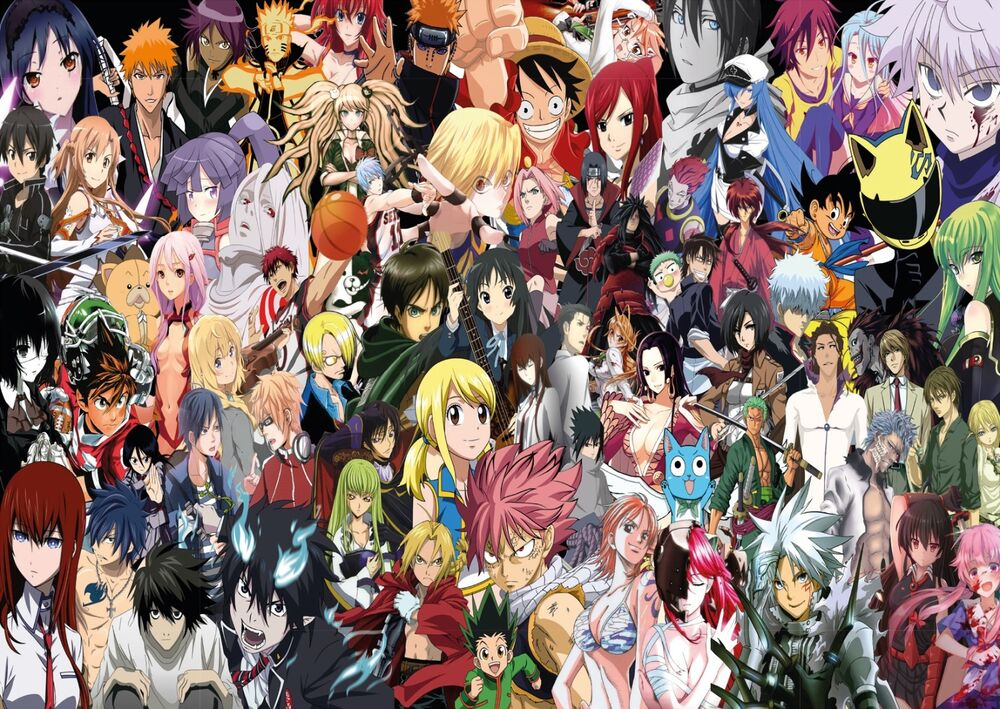

Sistem  Rekomendasi  adalah  suatu  aplikasi untuk   menyediakan   dan merekomendasikan suatu  item  dalam  membuat  suatu  keputusan yang diinginkan oleh pengguna. Keberadaan manga (komik Jepang) dan anime (film kartun animasi Jepang) sudah bukan hal yang asing di Indonesia. Keberadaan kedua media tersebut sudah cukup lama beredar di Indonesia. Beberapa stasiun televisi di Indonesia juga pernah menayangkan anime seperti Doraemon, Sailormoon, Dragonball ataupun Detective Conan dan Naruto. 

Anime adalah bagian dari budaya pop Jepang yang sudah menjadi bagian dari 
masyarakat secara dunia. Umumnya anime memiliki cerita yang sama dengan versi 
manga atau komiknya. anime dan manga menjadi media yang menjadi komoditas 
ekspor Jepang ke seluruh dunia selain video games. Anime sebenarnya merupakan versi bergerak dari manga yang umumnya terbit terlebih dahulu[1].

Genre anime didesain bagi penonton dengan preferensi tertentu, bukan 
sekedar ingin menikmati gambar lucu atau warna yang menarik tapi juga alur cerita yang dalam. Keberadaan alur cerita yang kompleks membuat tantangan yang lebih mendalam dalam menyusun cerita pada sebuah anime. Anime pada posisinya di dunia seni, merupakan bagian dari karya audio visual. Penggarapannya pun tidak lepas dari pakem yang ada pada saat penggarapan sebuah karya film pada umumnya.

Oleh karena itu penulis ingin membuat sebuah sistem rekomendasi yang dapat digunakan oleh penggemar anime maupun khalayak umum yang ingin menonton anime. Fungsi Rekomendasi sistem ini dapat membantu khalayak umum mendapatkan informasi anime yang mendapat rating tinggi dan membantu merekomendasikan anime sesuai yang diinginkan oleh pecinta anime.

## **Business Understanding**

### **Problem Statements**


Berdasarkan latar belakang yang menjadi tercipta nya penelitian ini, adapun rincian masalah yang dapat diselesaikan pada proyek ini adalah sebagai berikut :

*   Bagaimana merancang sebuah model sistem rekomendasi anime yang sesuai dengan minat penggemar anime?
*   Apa model yang paling baik yang digunakan dalam merekomendasikan penggemar anime dalam memilih anime?
*   Bagaimana cara kerja sistem rekomendasi untuk merekomendasikan penggemar  anime dalam dalam memilih anime?

### **Goals**

Adapun tujuan dilakukan nya penelitian ini yaitu:

*   Menghasilkan sebuah sistem rekomendasi anime untuk memudahkan penggemar anime dalam mencari anime yang sesuai dengan minatnya.
*   Membandingkan performa model yang efektif dalam sistem rekomendasi anime.
*   Menejelaskan cara kerja model algoritma yang digunakan dalam sistem rekomendasi untuk merekomendasikan anime.

### **Solution Statements**

Dalam rangka mencapai tujuan penelitian yang ada, penulis akan membangun model rekomendasi dengan 2 buah model yaitu *Content Based Filtering* dan *Collaborative Filtering*. Kedua model akan dibandingkan dan akan dipilih satu yang terbaik dengan performa serta accuracy terbaik yang digunakan :


*   **Content Based Filtering**

Metode *Content Based Filtering* bekerja dengan cara menyarankan produk yang serupa dengan yang disukai pengguna di masa lalu. Keserupaan item ditentukan tergantung pada sifat-sifat yang terkait dengan item yang dibandingkan. Misalnya, jika pengguna individu telah memberi peringkat yang baik untuk film yang terhubung ke kategori komedi, maka program dapat memahami untuk menyarankan film lain dari kategori ini. Selanjutnya, pemberi rekomendasi berbasis konten memperlakukan saran sebagai masalah kategori khusus pengguna dan mempelajari pengklasifikasi untuk preferensi pelanggan tergantung pada ciri-ciri produk. 

*Content-based recommender system* dapat digunakan dalam berbagai rentang domain yaitu, halaman web rekomendasi, artikel berita, pekerjaan, program televisi, dan produk untuk dijual.



*   **Collaborative Filtering**

Metode *Collaborative Filtering* memiliki kemampuan untuk memanfaatkan peringkat pengguna sebelumnya untuk memprediksi atau merekomendasikan konten baru yang akan disukai pengguna individu. Asumsi sebenarnya sangat didasarkan pada gagasan kesamaan antara pengguna atau antara produk, dengan kesamaan yang dinyatakan sebagai fungsi kesepakatan antara peringkat atau preferensi masa lalu.

## **Data Loading**

In [52]:
# Data and Visualization
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from zipfile import ZipFile
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from pathlib import Path

# TfidfVectorizer
import re
from sklearn.feature_extraction.text import TfidfVectorizer

# Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Directory
from google.colab import files

In [2]:
!pip install -q kaggle

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"adityayogaadhiputra","key":"2b4d823ee1ca87275658f0045cee735a"}'}

In [4]:
!rm -r ~/.kaggle
!mkdir ~/.kaggle
!mv ./kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle': No such file or directory


In [5]:
# Download dataset using kaggle API
!kaggle datasets download -d CooperUnion/anime-recommendations-database

 48% 12.0M/25.0M [00:00<00:00, 44.1MB/s]
100% 25.0M/25.0M [00:00<00:00, 77.9MB/s]


In [6]:
# unzip file
!unzip /content/anime-recommendations-database.zip

Archive:  /content/anime-recommendations-database.zip
  inflating: anime.csv               
  inflating: rating.csv              


## **Data Understanding**

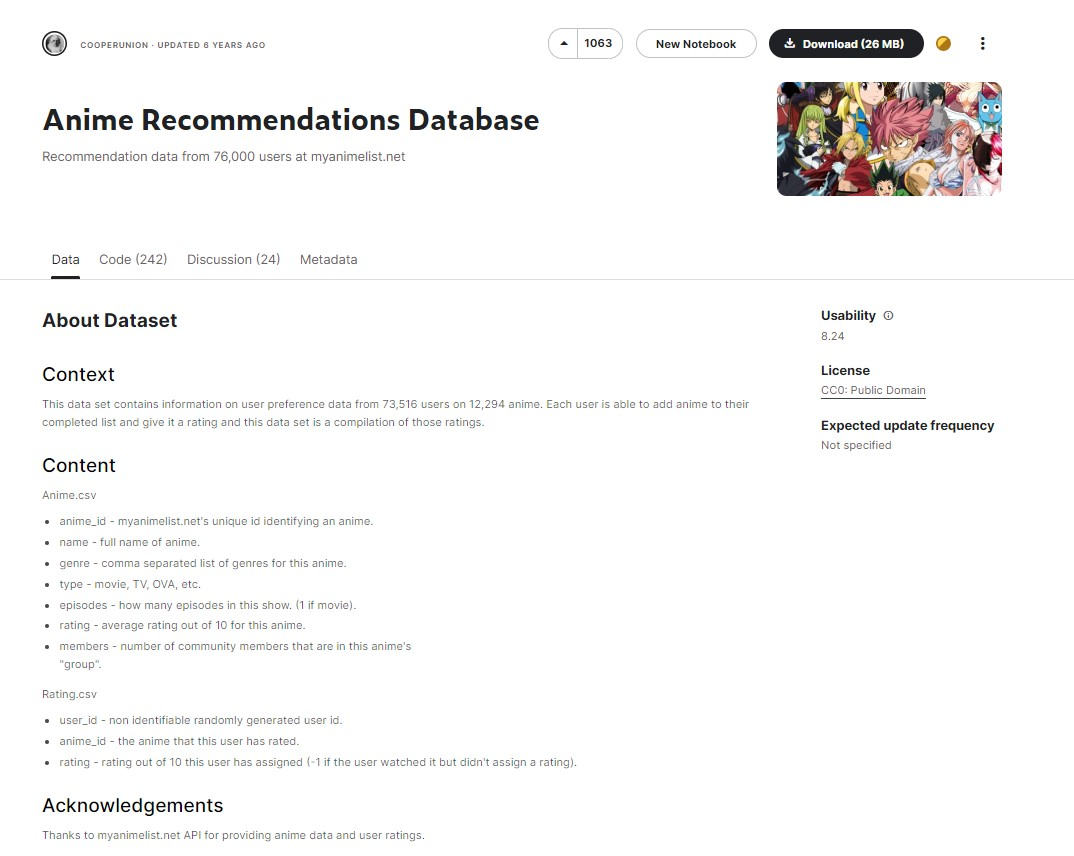

Dataset yang penulis gunakan dalam proyek ini, yaitu Dataset dengan judul Anime Recommendations Database yang diambil pada laman Kaggle [Anime Recommendations Database](https://www.kaggle.com/datasets/CooperUnion/anime-recommendations-database?select=rating.csv). Dataset tersebut berisikan 2 file csv, yaitu file *Anime* dan *Rating*. File Anime.csv yang terdiri dari 7 kolom dan 12294 baris, Sedangkan file Rating.csv terdiri dari 3 kolom dan 7813737 baris. 

Berikut merupakan informasi lebih detail dari masing masing kolom dataset:

*   **Anime.csv**
1.   `anime_id`: Id unik myanimelist.net mengidentifikasi anime.
2.   `name`: nama lengkap anime
3.   `genre`: daftar genre untuk anime ini.
4.   `type`: film, TV, OVA, dll.
5.   `episodes`: seberapa banyak episode dalam acara ini, 1 jika film.
6.   `rating`: peringkat rata-rata dari 10 untuk anime ini.
7.   `members`: jumlah anggota komunitas yang ada di anime ini
"kelompok"

*   **Rating.csv**

1.    `user_id`: id pengguna yang dibuat secara acak yang tidak dapat diidentifikasi.
2.   `anime_id`: anime yang telah dinilai pengguna ini.
3.   `rating`: anime yang telah dinilai oleh pengguna ini.rating dari 10 pengguna ini telah ditetapkan (-1 jika pengguna menontonnya tetapi tidak menetapkan peringkat).

In [7]:
# importing dataset

anime = pd.read_csv('anime.csv')
ratings = pd.read_csv('rating.csv')

# mencetak data unique pada kolom di masing-masing dataset

print(f'Jumlah dimensi data anime : {anime.shape}')
print('Jumlah data unique pada kolom anime_id : ', len(anime['anime_id'].unique()))
print('Jumlah data unique pada kolom name : ', len(anime['name'].unique()))
print('Jumlah data unique pada kolom type : ', len(anime['type'].unique()))
print('Jumlah data unique pada kolom episodes  : ', len(anime['episodes'].unique()))
print('Jumlah data unique pada kolom genre : ', len(anime['genre'].unique()))
print('Jumlah data unique pada kolom rating : ', len(anime['rating'].unique()))
print('Jumlah data unique pada kolom member : ', len(anime['members'].unique()))
print('\n')
print(f'Jumlah dimensi data peringkat : {ratings.shape}')
print('Jumlah data unique rating pada kolom rating: ', len(ratings['rating'].unique()))

Jumlah dimensi data anime : (12294, 7)
Jumlah data unique pada kolom anime_id :  12294
Jumlah data unique pada kolom name :  12292
Jumlah data unique pada kolom type :  7
Jumlah data unique pada kolom episodes  :  187
Jumlah data unique pada kolom genre :  3265
Jumlah data unique pada kolom rating :  599
Jumlah data unique pada kolom member :  6706


Jumlah dimensi data peringkat : (7813737, 3)
Jumlah data unique rating pada kolom rating:  11


**Anime Info**

In [8]:
anime.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [9]:
anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [10]:
print('Data unique genre : ', anime['genre'].unique())

Data unique genre :  ['Drama, Romance, School, Supernatural'
 'Action, Adventure, Drama, Fantasy, Magic, Military, Shounen'
 'Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen' ...
 'Hentai, Sports' 'Drama, Romance, School, Yuri' 'Hentai, Slice of Life']


In [11]:
print('Data unique type : ', anime['type'].unique())

Data unique type :  ['Movie' 'TV' 'OVA' 'Special' 'Music' 'ONA' nan]


**Ratings Info**

In [12]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB


In [13]:
ratings.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [14]:
print('Data unique ratings : ', ratings['rating'].unique())

Data unique ratings :  [-1 10  8  6  9  7  3  5  4  1  2]


In [15]:
print('Data unique user_id : ', ratings['user_id'].unique())

Data unique user_id :  [    1     2     3 ... 73514 73515 73516]


**Exploratory Data Analysis**

Text(0.5, 1.0, 'Number of anime by an type (Top 6)')

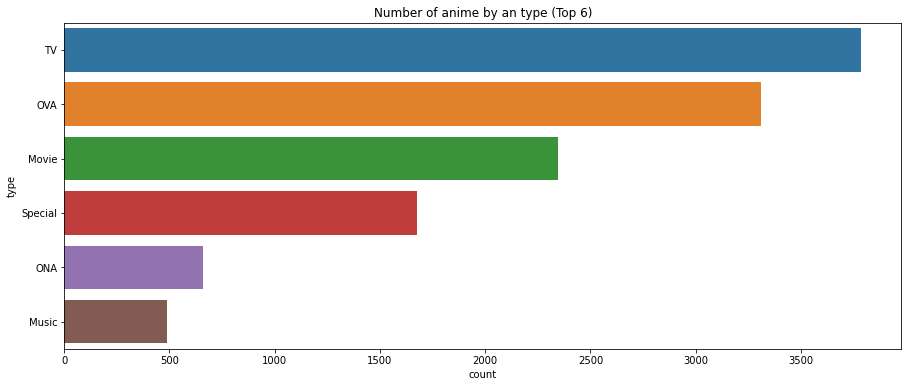

In [16]:
# visualize best 6 type of anime
plt.figure(figsize=(15,6))
sns.countplot(y="type", data=anime,order=anime['type'].value_counts().index[0:15])
plt.title("Number of anime by an type (Top 6)")

Text(0.5, 1.0, 'Number of anime by an genre (Top 15)')

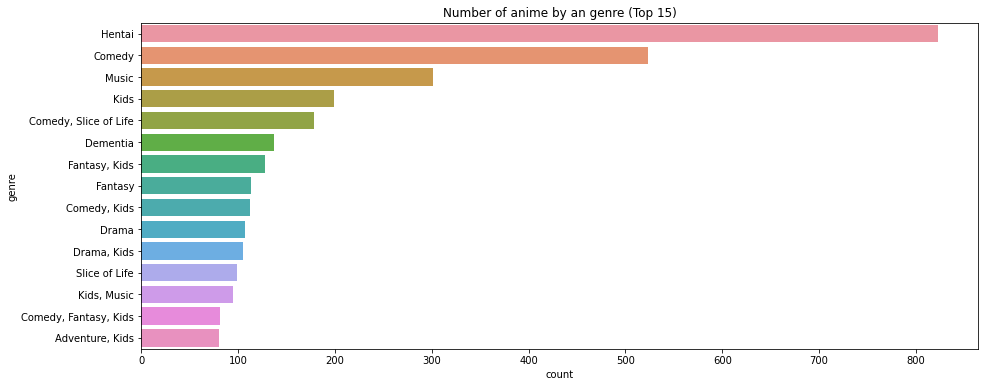

In [17]:
# visualize best 6 type of anime
plt.figure(figsize=(15,6))
sns.countplot(y="genre", data=anime,order=anime['genre'].value_counts().index[0:15])
plt.title("Number of anime by an genre (Top 15)")

## **Data Preparation**

In [18]:
# Menggabungkan dataframe anime dengan ratings dan memasukkannya ke dalam variabel anime_list 
anime_list = pd.merge(anime, ratings, on='anime_id', suffixes= ['', '_user'])
anime_list


,anime_id,name,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1
...,...,...,...,...,...,...,...,...,...
7813722,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,39532,-1
7813723,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,48766,-1
7813724,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175,60365,4
7813725,26081,Yasuji no Pornorama: Yacchimae!!,Hentai,Movie,1,5.46,142,27364,-1


**Data Cleaning**

In [19]:
# checking missing value
anime_list.isnull().sum()

anime_id         0
name             0
genre          110
type             4
episodes         0
rating           6
members          0
user_id          0
rating_user      0
dtype: int64

In [20]:
# droping missing value at column 'type'
anime_list.dropna(subset=['type'], inplace=True)

In [21]:
# droping missing value at column 'rating'
anime_list.dropna(subset=['rating'], inplace=True)

In [22]:
# filling missing value at column 'genre' to unknown
anime_list['genre'].fillna('Unknown', inplace=True)

In [23]:
# deleting row with rating < 0
anime_list = anime_list[anime_list["rating_user"] != -1]

In [24]:
# checking missing value
anime_list.isnull().sum()

anime_id       0
name           0
genre          0
type           0
episodes       0
rating         0
members        0
user_id        0
rating_user    0
dtype: int64

In [25]:
# rename column 'name' to 'anime_title'
anime_list = anime_list.rename(columns={"name": "anime_title"})

In [26]:
# cleaning the 'anime_title' using library re (regular expression)
def text_cleaner(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    text = re.sub(r'Â°', '',text)
    
    return text

anime_list['anime_title'] = anime_list['anime_title'].apply(text_cleaner)

In [27]:
anime_list.head(10)

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
5,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,322,10
6,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,398,10
7,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,462,8
8,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,490,10
9,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,548,10
10,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,570,10


In [28]:
# droping the duplicates value
anime_list = anime_list.drop_duplicates(subset=['anime_id', 'anime_title'])

In [29]:
anime_list.shape

(9924, 9)

In [30]:
anime_list.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,rating_user
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
2199,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665,3,10
26774,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262,43,10
28159,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572,5,9
47442,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266,5,9


In [31]:
# Mengonversi data series ‘anime_id’ menjadi dalam bentuk list
id_anime = anime_list['anime_id'].tolist()
 
# Mengonversi data series ‘anime_title’ menjadi dalam bentuk list
title_name = anime_list['anime_title'].tolist()
 
# Mengonversi data series ‘genre’ menjadi dalam bentuk list
genre = anime_list['genre'].tolist()
 
print(len(id_anime))
print(len(title_name))
print(len(genre))

9924
9924
9924


In [32]:
anime_new = pd.DataFrame({
    'id': id_anime,
    'title_name': title_name,
    'genre': genre
})
anime_new

,id,title_name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili..."
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S..."
3,9253,Steins;Gate,"Sci-Fi, Thriller"
4,9969,Gintama,"Action, Comedy, Historical, Parody, Samurai, S..."
...,...,...,...
9919,5541,The Satisfaction,Hentai
9920,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai
9921,5543,Under World,Hentai
9922,5621,Violence Gekiga David no Hoshi,Hentai


## **Modeling**

### **Model Development dengan Content Based Filtering**

In [33]:
data = anime_new
data.sample(5)

,id,title_name,genre
8481,29922,Ou-sama Ninatta Kitsune,Unknown
2168,3067,Saraba Uchuu Senkan Yamato: Ai no Senshi-tachi,"Action, Drama, Military, Sci-Fi, Space"
5957,854,Soul Link,"Action, Adventure, Comedy, Military, Romance, ..."
9063,5347,Bible Black: Imari Ryoujoku Genba,Hentai
8787,7625,Yousei Dick,"Fantasy, Kids"


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
 
# Inisialisasi TfidfVectorizer
tf = TfidfVectorizer()
 
# Melakukan perhitungan idf pada data genre
tf.fit(data['genre']) 
 
# Mapping array dari fitur index integer ke fitur nama
tf.get_feature_names() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['action',
 'adventure',
 'ai',
 'arts',
 'cars',
 'comedy',
 'dementia',
 'demons',
 'drama',
 'ecchi',
 'fantasy',
 'fi',
 'game',
 'harem',
 'hentai',
 'historical',
 'horror',
 'josei',
 'kids',
 'life',
 'magic',
 'martial',
 'mecha',
 'military',
 'music',
 'mystery',
 'of',
 'parody',
 'police',
 'power',
 'psychological',
 'romance',
 'samurai',
 'school',
 'sci',
 'seinen',
 'shoujo',
 'shounen',
 'slice',
 'space',
 'sports',
 'super',
 'supernatural',
 'thriller',
 'unknown',
 'vampire',
 'yaoi',
 'yuri']

In [35]:
# Melakukan fit lalu ditransformasikan ke bentuk matrix
tfidf_matrix = tf.fit_transform(data['genre']) 
 
# Melihat ukuran matrix tfidf
tfidf_matrix.shape 

(9924, 48)

In [36]:
# Mengubah vektor tf-idf dalam bentuk matriks dengan fungsi todense()
tfidf_matrix.todense()

matrix([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.29057278, 0.32077906, 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.24397413, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ]])

In [37]:
# Membuat dataframe untuk melihat tf-idf matrix
# Kolom diisi dengan genre
# Baris diisi dengan title_name
 
pd.DataFrame(
    tfidf_matrix.todense(), 
    columns=tf.get_feature_names(),
    index=data.title_name
).sample(22, axis=1).sample(10, axis=0)

,historical,cars,unknown,harem,sci,ecchi,super,yaoi,hentai,demons,...,samurai,kids,horror,shoujo,action,power,sports,space,yuri,of
title_name,,,,,,,,,,,,,,,,,,,,,
Glass no Kamen (2005),0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.807429,0.000000,0.0,0.0,0.0,0.0,0.000000
Chou Zenmairobo: Patrasche,0.480579,0.0,0.0,0.0,0.333444,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Rhythm: Koi no Rhythm,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Toei Robot Girls,0.000000,0.0,0.0,0.0,0.396058,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Black Lagoon: The Second Barrage,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.507863,0.0,0.0,0.0,0.0,0.000000
Pokemon: Bokutachi Pichu Brothers - Party wa Oosawagi! no Maki,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.640675,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Nurarihyon no Mago OVA,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.678466,...,0.0,0.000000,0.0,0.000000,0.348827,0.0,0.0,0.0,0.0,0.000000
Animegatari x Ghost in the Shell Collab Eizou,0.000000,0.0,0.0,0.0,0.627234,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000
Eikyuu Kazoku,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000


In [38]:
from sklearn.metrics.pairwise import cosine_similarity
 
# Menghitung cosine similarity pada matrix tf-idf
cosine_sim = cosine_similarity(tfidf_matrix) 
cosine_sim

array([[1.        , 0.15442841, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.15442841, 1.        , 0.17137717, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.17137717, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ]])

In [39]:
# Membuat dataframe dari variabel cosine_sim dengan baris dan kolom berupa title_name
cosine_sim_df = pd.DataFrame(cosine_sim, index=data['title_name'], columns=data['title_name'])
print('Shape:', cosine_sim_df.shape)
 
# Melihat similarity matrix pada setiap resto
cosine_sim_df.sample(5, axis=1).sample(10, axis=0)

Shape: (9924, 9924)


title_name,Yuu☆Yuu☆Hakusho (Movie),Overman King Gainer,Sonic★the★Hedgehog,Chiisana Kinomi,Transformers: Choujin Master Force
title_name,,,,,
Is,0.000000,0.000000,0.000000,0.000000,0.000000
Gamba: Gamba to Nakama-tachi,0.386115,0.228839,0.271989,0.560720,0.244073
Transformers Headmasters,0.265243,0.937583,0.792233,0.000000,1.000000
Maken-Ki! Two Specials,0.000000,0.000000,0.000000,0.000000,0.000000
Ore no Sora Keiji-hen,0.223725,0.132595,0.000000,0.000000,0.000000
Miracle☆Train: Oedo-sen e Youkoso,0.000000,0.000000,0.000000,0.000000,0.000000
Gintama: Shinyaku Benizakura-hen,0.241323,0.419874,0.467354,0.000000,0.357333
Kojin Taxi,0.000000,0.000000,0.000000,0.000000,0.000000
My Melody no Akazukin,0.000000,0.000000,0.000000,0.556436,0.000000


In [59]:
def anime_recommendations(title, similarity_data=cosine_sim_df, items=data[['title_name', 'genre']], k=5):
    """
    Rekomendasi anime berdasarkan kemiripan dataframe
 
    Parameter:
    ---
    title : tipe data string (str)
                judul anime (index kemiripan dataframe)
    similarity_data : tipe data pd.DataFrame (object)
                      Kesamaan dataframe, simetrik, dengan anime sebagai 
                      indeks dan kolom
    items : tipe data pd.DataFrame (object)
            Mengandung kedua nama dan fitur lainnya yang digunakan untuk mendefinisikan kemiripan
    k : tipe data integer (int)
        Banyaknya jumlah rekomendasi yang diberikan
    ---
 
 
    Pada index ini, kita mengambil k dengan nilai similarity terbesar 
    pada index matrix yang diberikan (i).
    """
 
 
    # Mengambil data dengan menggunakan argpartition untuk melakukan partisi secara tidak langsung sepanjang sumbu yang diberikan    
    # Dataframe diubah menjadi numpy
    # Range(start, stop, step)
    index = similarity_data.loc[:,title].to_numpy().argpartition(
        range(-1, -k, -1))
    
    # Mengambil data dengan similarity terbesar dari index yang ada
    closest = similarity_data.columns[index[-1:-(k+2):-1]]
    
    # Drop nama_resto agar nama resto yang dicari tidak muncul dalam daftar rekomendasi
    closest = closest.drop(title, errors='ignore')
 
    return pd.DataFrame(closest).merge(items).head(k)

In [41]:
data[data.title_name.eq('Kimi no Na wa.')]

,id,title_name,genre
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural"


In [42]:
# Mendapatkan rekomendasi anime
anime_recommendations('Kimi no Na wa.')

,title_name,genre
0,Wind: A Breath of Heart (TV),"Drama, Romance, School, Supernatural"
1,Wind: A Breath of Heart OVA,"Drama, Romance, School, Supernatural"
2,Aura: Maryuuin Kouga Saigo no Tatakai,"Comedy, Drama, Romance, School, Supernatural"
3,Harmonie,"Drama, School, Supernatural"
4,Angel Beats!: Another Epilogue,"Drama, School, Supernatural"


### **Model Development dengan Collaborative Filtering**

In [43]:
df = anime_list[['anime_id','user_id','rating','rating_user']]
df.head()

,anime_id,user_id,rating,rating_user
0,32281,99,9.37,5
2199,5114,3,9.26,10
26774,28977,43,9.25,10
28159,9253,5,9.17,9
47442,9969,5,9.16,9


In [44]:
# Mengubah userID menjadi list tanpa nilai yang sama
user_ids = df['user_id'].unique().tolist()
print('list user_id: ', user_ids)
 
# Melakukan encoding userID
user_to_user_encoded = {x: i for i, x in enumerate(user_ids)}
print('encoded user_id : ', user_to_user_encoded)
 
# Melakukan proses encoding angka ke ke userID
user_encoded_to_user = {i: x for i, x in enumerate(user_ids)}
print('encoded angka ke user_id: ', user_encoded_to_user)

list user_id:  [99, 3, 43, 5, 17, 7, 183, 2378, 46, 11, 19, 14, 21, 233, 2695, 1551, 152, 308, 1954, 82, 123, 235, 51, 38, 12, 39, 373, 160, 1591, 247, 2, 98, 341, 244, 139, 148, 50, 109, 52, 33, 74, 40, 75, 234, 27, 37, 93, 77, 250, 31, 294, 45, 2589, 61, 65, 276, 129, 370, 25, 125, 3615, 96, 68, 475, 159, 24, 382, 48, 1145, 339, 298, 428, 861, 439, 478, 18, 29, 1116, 392, 128, 1237, 511, 226, 210, 85, 720, 44, 271, 1798, 1060, 66, 171, 771, 191, 2632, 248, 23, 385, 73, 55, 57, 269, 644, 562, 885, 2819, 167, 395, 63076, 165, 95, 324, 169, 127, 1019, 1447, 217, 1497, 120, 418, 847, 3360, 87, 47, 1679, 108, 352, 784, 1396, 79, 80, 3254, 1835, 1924, 196, 135, 1400, 342, 317, 104, 661, 572, 21180, 288, 1822, 659, 567, 10194, 634, 2527, 533, 154, 94, 640, 346, 134, 225, 682, 163, 1, 15455, 277, 290, 1960, 775, 280, 1530, 954, 190, 256, 350, 192, 516, 62, 446, 81, 3269, 1549, 1426, 118, 565, 8, 189, 64, 321, 1378, 5419, 111, 1043, 164, 436, 107, 36, 591, 820, 438, 97, 1677, 1344, 4339, 540,

In [45]:
# Mengubah anime_id menjadi list tanpa nilai yang sama
anime_ids = df['anime_id'].unique().tolist()
 
# Melakukan proses encoding anime_id
anime_to_anime_encoded = {x: i for i, x in enumerate(anime_ids)}
 
# Melakukan proses encoding angka ke anime_id
anime_encoded_to_anime = {i: x for i, x in enumerate(anime_ids)}

In [61]:
# Mapping user_id ke dataframe user
df['user'] = df['user_id'].map(user_to_user_encoded)
 
# Mapping anime_id ke dataframe anime
df['anime'] = df['anime_id'].map(anime_to_anime_encoded)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [47]:
# Mendapatkan jumlah user
num_users = len(user_to_user_encoded)
print(num_users)
 
# Mendapatkan jumlah anime
num_anime = len(anime_to_anime_encoded)
print(num_anime)
 
# Mengubah rating menjadi nilai float
df['rating'] = df['rating'].values.astype(np.float32)
 
# Nilai minimum rating
min_rating = min(df['rating'])
 
# Nilai maksimal rating
max_rating = max(df['rating'])
 
print('Number of User: {}, Number of anime: {}, Min Rating: {}, Max Rating: {}'.format(
    num_users, num_anime, min_rating, max_rating
))

1731
9924
Number of User: 1731, Number of anime: 9924, Min Rating: 2.0, Max Rating: 9.369999885559082


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [48]:
# Mengacak dataset
df = df.sample(frac=1, random_state=42)
df

,anime_id,user_id,rating,rating_user,user,anime
7372054,6277,12725,6.48,3,421,5268
2426029,780,233,8.00,10,13,510
7090873,2390,50,6.73,8,36,4328
7688069,16954,18686,5.47,5,555,8381
7793482,5399,5392,5.97,7,893,9524
...,...,...,...,...,...,...
7472176,4948,5149,6.34,7,647,5734
7350941,10528,312,6.50,9,828,5191
7398212,133,14,6.44,6,11,5390
3395298,9000,120,7.79,8,118,860


In [49]:
# Membuat variabel x untuk mencocokkan data user dan anime menjadi satu value
x = df[['user', 'anime']].values
 
# Membuat variabel y untuk membuat rating dari hasil 
y = df['rating'].apply(lambda x: (x - min_rating) / (max_rating - min_rating)).values
 
# Membagi menjadi 80% data train dan 20% data validasi
train_indices = int(0.8 * df.shape[0])
x_train, x_val, y_train, y_val = (
    x[:train_indices],
    x[train_indices:],
    y[:train_indices],
    y[train_indices:]
)
 
print(x, y)

[[ 421 5268]
 [  13  510]
 [  36 4328]
 ...
 [  11 5390]
 [ 118  860]
 [ 484 7270]] [0.60786975 0.81411127 0.64179106 ... 0.60244235 0.78561737 0.46675714]


In [53]:
class RecommenderNet(tf.keras.Model):
 
  # Insialisasi fungsi
  def __init__(self, num_users, num_anime, embedding_size, **kwargs):
    super(RecommenderNet, self).__init__(**kwargs)
    self.num_users = num_users
    self.num_resto = num_anime
    self.embedding_size = embedding_size
    self.user_embedding = layers.Embedding( # layer embedding user
        num_users,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.user_bias = layers.Embedding(num_users, 1) # layer embedding user bias
    self.resto_embedding = layers.Embedding( # layer embeddings resto
        num_anime,
        embedding_size,
        embeddings_initializer = 'he_normal',
        embeddings_regularizer = keras.regularizers.l2(1e-6)
    )
    self.resto_bias = layers.Embedding(num_anime, 1) # layer embedding resto bias
 
  def call(self, inputs):
    user_vector = self.user_embedding(inputs[:,0]) # memanggil layer embedding 1
    user_bias = self.user_bias(inputs[:, 0]) # memanggil layer embedding 2
    anime_vector = self.resto_embedding(inputs[:, 1]) # memanggil layer embedding 3
    anime_bias = self.resto_bias(inputs[:, 1]) # memanggil layer embedding 4
 
    dot_user_anime = tf.tensordot(user_vector, anime_vector, 2) 
 
    x = dot_user_anime + user_bias + anime_bias
    
    return tf.nn.sigmoid(x) # activation sigmoid

In [54]:
model = RecommenderNet(num_users, num_anime, 50) # inisialisasi model
 
# model compile
model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = keras.optimizers.Adam(learning_rate=0.001),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

In [55]:
# Memulai training
 
history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 8,
    epochs = 100,
    validation_data = (x_val, y_val)
)

Epoch 1/100
993/993 [==============================] - 12s 10ms/step - loss: 0.6843 - root_mean_squared_error: 0.1665 - val_loss: 0.6772 - val_root_mean_squared_error: 0.1546
Epoch 2/100
993/993 [==============================] - 11s 11ms/step - loss: 0.6522 - root_mean_squared_error: 0.1095 - val_loss: 0.6734 - val_root_mean_squared_error: 0.1479
Epoch 3/100
993/993 [==============================] - 10s 10ms/step - loss: 0.6481 - root_mean_squared_error: 0.0999 - val_loss: 0.6712 - val_root_mean_squared_error: 0.1442
Epoch 4/100
993/993 [==============================] - 11s 11ms/step - loss: 0.6457 - root_mean_squared_error: 0.0940 - val_loss: 0.6691 - val_root_mean_squared_error: 0.1404
Epoch 5/100
993/993 [==============================] - 10s 10ms/step - loss: 0.6432 - root_mean_squared_error: 0.0875 - val_loss: 0.6674 - val_root_mean_squared_error: 0.1374
Epoch 6/100
993/993 [==============================] - 9s 9ms/step - loss: 0.6414 - root_mean_squared_error: 0.0824 - val_los

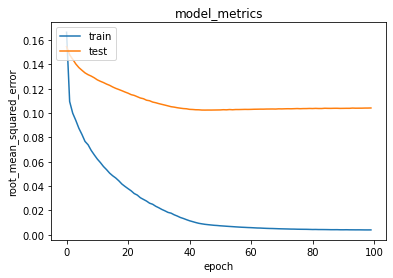

In [56]:
plt.plot(history.history['root_mean_squared_error'])
plt.plot(history.history['val_root_mean_squared_error'])
plt.title('model_metrics')
plt.ylabel('root_mean_squared_error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [57]:
anime_df = anime_new
df = anime_list[['anime_id','user_id','rating','rating_user']]

# Mengambil sample user
userID = df.user_id.sample(1).iloc[0]
anime_recommend_by_user = df[df.user_id == userID]
 
# Operator bitwise (~), bisa diketahui di sini https://docs.python.org/3/reference/expressions.html 
anime_not_recommend = anime_df[~anime_df['id'].isin(anime_recommend_by_user.anime_id.values)]['id'] 
anime_not_recommend = list(
    set(anime_not_recommend)
    .intersection(set(anime_to_anime_encoded.keys()))
)
 
anime_not_recommend = [[anime_to_anime_encoded.get(x)] for x in anime_not_recommend]
user_encoder = user_to_user_encoded.get(userID)
user_anime_array = np.hstack(
    ([[user_encoder]] * len(anime_not_recommend), anime_not_recommend)
)

In [58]:
ratings = model.predict(user_anime_array).flatten()
 
top_ratings_indices = ratings.argsort()[-10:][::-1]
recommended_anime_ids = [
    anime_encoded_to_anime.get(anime_not_recommend[x][0]) for x in top_ratings_indices
]
 
print('Showing best anime recommendations for users: {}'.format(userID))
print('===' * 9)
print('Anime with high ratings from user')
print('----' * 8)
 
top_recommend_user = (
    anime_recommend_by_user.sort_values(
        by = 'rating',
        ascending=False
    )
    .head(5)
    .anime_id.values
)
 
anime_df_rows = anime_df[anime_df['id'].isin(top_recommend_user)]
for row in anime_df_rows.itertuples():
    print(row.title_name, ':', row.genre)
 
print('----' * 8)
print('Top 10 Anime recommendation')
print('----' * 8)
 
recommended_anime = anime_df[anime_df['id'].isin(recommended_anime_ids)]
for row in recommended_anime.itertuples():
    print(row.title_name, ':', row.genre)

Showing best anime recommendations for users: 29
Anime with high ratings from user
--------------------------------
Interstella5555: The 5tory of The 5ecret 5tar 5ystem : Adventure, Drama, Music, Sci-Fi
Shingeki no Kyojin OVA : Action, Drama, Fantasy, Shounen, Super Power
Dragon Ball Z Special 2: Zetsubou e no Hankou!! Nokosareta Chousenshi - Gohan to Trunks : Adventure, Drama, Fantasy, Shounen
Kill la Kill Special : Action, Comedy, School, Super Power
Dragon Ball Z Special 1: Tatta Hitori no Saishuu Kessen : Adventure, Comedy, Fantasy, Sci-Fi, Shounen
--------------------------------
Top 10 Anime recommendation
--------------------------------
Kimi no Na wa. : Drama, Romance, School, Supernatural
Gintama° : Action, Comedy, Historical, Parody, Samurai, Sci-Fi, Shounen
Steins;Gate : Sci-Fi, Thriller
Hunter x Hunter (2011) : Action, Adventure, Shounen, Super Power
Ginga Eiyuu Densetsu : Drama, Military, Sci-Fi, Space
Gintama Movie: Kanketsu-hen - Yorozuya yo Eien Nare : Action, Comedy, H

## **Evaluation**

**Cosine similarity**

Cosine similarity adalah metriks yang membantu dalam menentukan seberapa mirip objek data terlepas dari ukurannya. Dalam Cosine similarity, objek data dalam kumpulan data diperlakukan sebagai vektor. Rumus untuk mencari persamaan cosinus antara dua vektor adalah:

![cossine](https://user-images.githubusercontent.com/55022521/192092471-8c4b2f08-fddd-4bd9-8398-f584657e91be.jpg)

`Cos(x, y) = x . y / ||x|| * ||y||`

Keterangan :
- `x . y = product (dot) of the vectors ‘x’ and ‘y’.`
- `||x|| and ||y|| = length of the two vectors ‘x’ and ‘y’.`
- `||x|| * ||y|| = cross product of the two vectors ‘x’ and ‘y’.`

Keuntungan Cosine similarity :

- Kesamaan kosinus bermanfaat karena bahkan jika dua objek data serupa terpisah jauh oleh jarak Euclidean karena ukurannya, mereka masih dapat memiliki sudut yang lebih kecil di antara mereka. Semakin kecil sudutnya, semakin tinggi kesamaannya.
- Ketika diplot pada ruang multidimensi, kesamaan kosinus menangkap orientasi (sudut) dari objek data dan bukan besarnya.

Matrix Cosine Similarity

| **title_name**                 | Soredemo Tsuma wo Aishiteru | Emi to Yobanaide | Hyakujuu-Ou GoLion | Yoshinaga-sanchi no Gargoyle | Attacker You! |
|--------------------------------|-----------------------------|------------------|--------------------|------------------------------|---------------|
| Strike Witches 2               | 0.0                         | 0.0              | 0.275165           | 0.000000                     | 0.102196      |
| Shikabane Hime: Aka            | 0.0                         | 0.0              | 0.000000           | 0.000000                     | 0.098475      |
| Tayutayu: Pure My Heart        | 0.0                         | 0.0              | 0.000000           | 0.295969                     | 0.000000      |
| Bikini Warriors Special        | 0.0                         | 0.0              | 0.000000           | 0.178267                     | 0.000000      |
| Pokemon: Pikachu no Fuyuyasumi | 0.0                         | 0.0              | 0.194750           | 0.301418                     | 0.000000      |
| Idol Project                   | 0.0                         | 0.0              | 0.219851           | 0.119199                     | 0.000000      |
| Ninja and Soldier              | 0.0                         | 0.0              | 0.000000           | 0.000000                     | 0.000000      |
| Redline Pilot                  | 0.0                         | 0.0              | 0.000000           | 0.000000                     | 0.338728      |
| Seijuuki Cyguard               | 0.0                         | 0.0              | 0.666296           | 0.000000                     | 0.000000      |
| Prima Donna Mai                | 1.0                         | 1.0              | 0.000000           | 0.000000                     | 0.000000      |

Pada perhitungan Cosine Similarity, skor kesamaan berkisar dari 0 hingga 1, dengan 0 sebagai yang terendah (paling tidak mirip) dan 1 sebagai yang tertinggi (paling mirip).

Contohnya anime dengan judul **'Prima Donna Mai'** memiliki nilai 1.0 dengan anime yang berjudul **'Soredemo Tsuma wo Aishiteru'** dan **'Emi to Yobanaide'**. Dengan nilai tersebut maka dikatakan bahwa anime tersebut memiliki kemiripan yang sangat kuat. Jika < 1 atau mendekati 0 maka anime tersebut berkurang kemiripan nya atau mungkin saja tidak mirip.


**Root Mean Squared Error**

Root Mean Squared Error (RMSE) adalah salah satu metrik evaluasi paling populer untuk masalah regresi. RMSE dihitung dengan mengambil akar kuadrat dari MSE:

![rmse](https://user-images.githubusercontent.com/55022521/192090047-110a1997-53b6-4e98-a42f-da844ec38e65.png)

Nilai yang dihasilkan dapat diinterpretasikan dalam unit yang sama dengan nilai prediksi. Root Mean Squared Error (RMSE) lebih mudah dipahami daripada beberapa metrik lainnya. Namun nilai RMSE hanya dapat dibandingkan antara model yang mengukur kesalahan menggunakan unit yang sama. Nilai RMSE yang lebih rendah menunjukkan performa model yang lebih baik. RMSE harus digunakan di atas MAE atau metrik evaluasi lainnya dalam situasi di mana data yang diamati memiliki distribusi kondisional asimetris.

Berikut merupakan hasil dari Root Mean Squared Error dari model Model Development dengan Collaborative Filtering.
Pada gambar dibawah terlihat bahwa pada nilai RMSE pada data test yaitu 0.16 lebih tinggi dibandingkan dengan RMSE pada data_train.

![hasil](https://user-images.githubusercontent.com/55022521/192092028-6bc1d932-5fea-4d13-affd-113d6f826979.png)

### **Conclusion**

Sistem Rekomendasi ini dibangun untuk memudahkan user dalam mencari anime sesuai minat mereka. Jika tergolong user baru yang belum pernah menonton anime, maka sistem rekomendasi dengan *collaborative filtering* dapat membantu karena dapat merekomendasikan anime berdasarkan rating pengguna lainya. Jika user yang sering menonton anime maka sistem rekomendasi dengan *Content Based filtering* dapat membantu user dalam memilih anime berdasarkan genre film atau yang jalan cerita nya mirip dengan anime yang telah user tonton. 

## **Reference**


[1] Ito, M., Okabe, D., & Tsuji, I. (2005). Fandom Unbound. London: Yale University Press.

[[2]](https://www.researchgate.net/publication/287952023_Collaborative_Filtering_Recommender_Systems)
Schafer, J.B., F. Dan, H. Jon and S. Shilad, 2007b.

[[3]](https://www.researchgate.net/publication/287952023_Collaborative_Filtering_Recommender_Systems)
Collaborative Filtering Recommender Systems. In:Brusilovsky, P., K. Alfred and N. Wolfgang(Eds.), The Adaptive Web of Lecture Notes inComputer Science. Springer-Verlag, Berlin,Germany, 4321: 291-324.

[[4]](https://www.researchgate.net/publication/287952023_Collaborative_Filtering_Recommender_Systems)
Ziegler, C., 2004. Semantic web recommender systems.Proceedings of the EDBT Workshop, pp: 78-89.

[[5]](https://www.researchgate.net/publication/287952023_Collaborative_Filtering_Recommender_Systems)
Ziegler, C.N., S.M. Mcnee, J.A. Konstan and L. Georg,2005. Improving recommendation lists throughtopic diversification. Proceeding of the 14thInternational World Wide Web Conference(WWW). ACM, Chiba, Japan, pp: 22-32.

[[6]](https://www.worldscientific.com/doi/abs/10.1142/S0218213009000378)
Sebastia, Let al. 2009. e-Tourism: A touristr recommendation and planning application. International Journal on Artificial Intelligence Tools18(5): 717-738

[[7]](https://www.worldscientific.com/doi/abs/10.1142/S0218213009000378)
Lutfi,E.T. & Kusrini. 2009. Algoritma Data Mining. Yogyakarta: CV AndiOffset

[[8]](https://doaj.org/article/6816ea622b08499597070a9073e28b7c)
Wijaya, A., & Alfian, D. 2018. Sistem Rekomendasi Laptop  Menggunakan  Collaborative  Filtering  dan Content-Based   Filtering.   Jurnal   Computech   dan Bisnis, 12(1),11-27

[9] Kurniawan S, Daniel, 2019. STUDI SEMIOTIKA KARAKTER MONOKUMA PADA ANIME FRANCHISE SERIES “DANGANRONPA”.